# Card Catalog Spatial Frequencies

https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

Installing geopandas on conda prompt

Run activate geo_env, jupyter notebook on conda prompt

https://medium.com/@m_vemuri/create-a-geographic-heat-map-of-the-city-of-toronto-in-python-cd2ae0f8be55

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

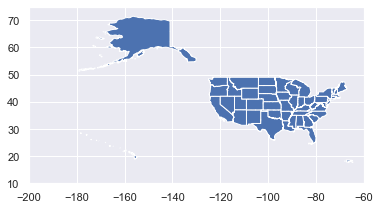

In [29]:
# Read shapefile and load in card catalog dataset
usa = gpd.read_file('tl_2020_us_state/tl_2020_us_state.shp')

df = pd.read_csv('C:/Users/heidi/Desktop/rl/Data--Rubenstein-Library-Card-Catalog/all_sorted_collection.csv')

# Print empty plot
usa.plot()
plt.xlim([-200, -60])
plt.ylim([10, 75])
plt.show()

In [41]:
# Sort alphabetically
usa = usa.sort_values(by=['STATEFP'])

In [64]:
# Store names and counts
# State Name	USPS Abbreviation	Traditional Abbreviation

states = {
"Alabama	AL	Ala.": 0,
"Alaska	AK	Alaska": 0,
"Arizona	AZ	Ariz.": 0,
"Arkansas	AR	Ark.": 0,
"California	CA	Calif.": 0,
"Colorado	CO	Colo.": 0,
"Connecticut	CT	Conn.": 0,
"Delaware	DE	Del.": 0,
"District of Columbia	DC	D.C.": 0,
"Florida	FL	Fla.": 0,
"Georgia	GA	Ga.": 0,
"Hawaii	HI	Hawaii": 0,
"Idaho	ID	Idaho": 0,
"Illinois	IL	Ill.": 0,
"Indiana	IN	Ind.": 0,
"Iowa	IA	Iowa": 0,
"Kansas	KS	Kans.": 0,
"Kentucky	KY	Ky.": 0,
"Louisiana	LA	La.": 0,
"Maine	ME	Maine": 0,
"Maryland	MD	Md.": 0,
"Massachusetts	MA	Mass.": 0,
"Michigan	MI	Mich.": 0,
"Minnesota	MN	Minn.": 0,
"Mississippi	MS	Miss.": 0,
"Missouri	MO	Mo.": 0,
"Montana	MT	Mont.": 0,
"Nebraska	NE	Neb. or Nebr.": 0,
"Nevada	NV	Nev.": 0,
"New Hampshire	NH	N.H.": 0,
"New Jersey	NJ	N.J.": 0,
"New Mexico	NM	N.Mex.": 0,
"New York	NY	N.Y.": 0,
"North Carolina	NC	N.C.": 0,
"North Dakota	ND	N.Dak.": 0,
"Ohio	OH	Ohio": 0,
"Oklahoma	OK	Okla.": 0,
"Oregon	OR	Ore. or Oreg.": 0,
"Pennsylvania	PA	Pa.": 0,
"Rhode Island	RI	R.I.": 0,
"South Carolina	SC	S.C.": 0,
"South Dakota	SD	S.Dak.": 0,
"Tennessee	TN	Tenn.": 0,
"Texas	TX	Tex. or Texas": 0,
"Utah	UT	Utah": 0,
"Vermont	VT	Vt.": 0,
"Virginia	VA	Va.": 0,
"Washington	WA	Wash.": 0,
"West Virginia	WV	W.Va.": 0,
"Wisconsin	WI	Wis. or Wisc.": 0,
"Wyoming	WY	Wyo.": 0,
"American Samoa	AS	Amer. Samoa": 0,
"Guam	GU	Guam": 0,
"Northern Mariana Islands	MP	M.P.": 0,
"Puerto Rico	PR	P.R.": 0,
"Virgin Islands	VI	V.I.": 0,
}

In [68]:
# Add actual counts from catalog dataset
# Function to check if location is a state and add to counts
def find_state(s):
    # Check in list of states
    for key in states:
        if s in key:
            states[key] = states.get(key) + 1
    
# Loop through each main entry and try to gather location
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        # Try to get state name or abbreviation
        locs = str(row['Loc']).split(",")
        if len(locs) < 1:
            continue
        elif len(locs) == 1:
            find_state(locs[0])
        elif len(locs) == 2:
            find_state(locs[1])
            for i in range(2, len(locs)):
                find_state(locs[i])
            
print(states)

{'Alabama\tAL\tAla.': 59, 'Alaska\tAK\tAlaska': 1, 'Arizona\tAZ\tAriz.': 2, 'Arkansas\tAR\tArk.': 9, 'California\tCA\tCalif.': 4, 'Colorado\tCO\tColo.': 3, 'Connecticut\tCT\tConn.': 27, 'Delaware\tDE\tDel.': 4, 'District of Columbia\tDC\tD.C.': 11, 'Florida\tFL\tFla.': 7, 'Georgia\tGA\tGa.': 101, 'Hawaii\tHI\tHawaii': 1, 'Idaho\tID\tIdaho': 1, 'Illinois\tIL\tIll.': 14, 'Indiana\tIN\tInd.': 22, 'Iowa\tIA\tIowa': 5, 'Kansas\tKS\tKans.': 3, 'Kentucky\tKY\tKy.': 22, 'Louisiana\tLA\tLa.': 15, 'Maine\tME\tMaine': 5, 'Maryland\tMD\tMd.': 36, 'Massachusetts\tMA\tMass.': 51, 'Michigan\tMI\tMich.': 2, 'Minnesota\tMN\tMinn.': 3, 'Mississippi\tMS\tMiss.': 27, 'Missouri\tMO\tMo.': 15, 'Montana\tMT\tMont.': 2, 'Nebraska\tNE\tNeb. or Nebr.': 13, 'Nevada\tNV\tNev.': 5, 'New Hampshire\tNH\tN.H.': 14, 'New Jersey\tNJ\tN.J.': 15, 'New Mexico\tNM\tN.Mex.': 11, 'New York\tNY\tN.Y.': 205, 'North Carolina\tNC\tN.C.': 393, 'North Dakota\tND\tN.Dak.': 3, 'Ohio\tOH\tOhio': 29, 'Oklahoma\tOK\tOkla.': 3, 'Oregon\

In [78]:
# Add state counts to geo dataframe
vals = states.values()
usa['Count'] = vals

<AxesSubplot:title={'center':'Spatial Frequency of Card Catalog Manuscripts'}>

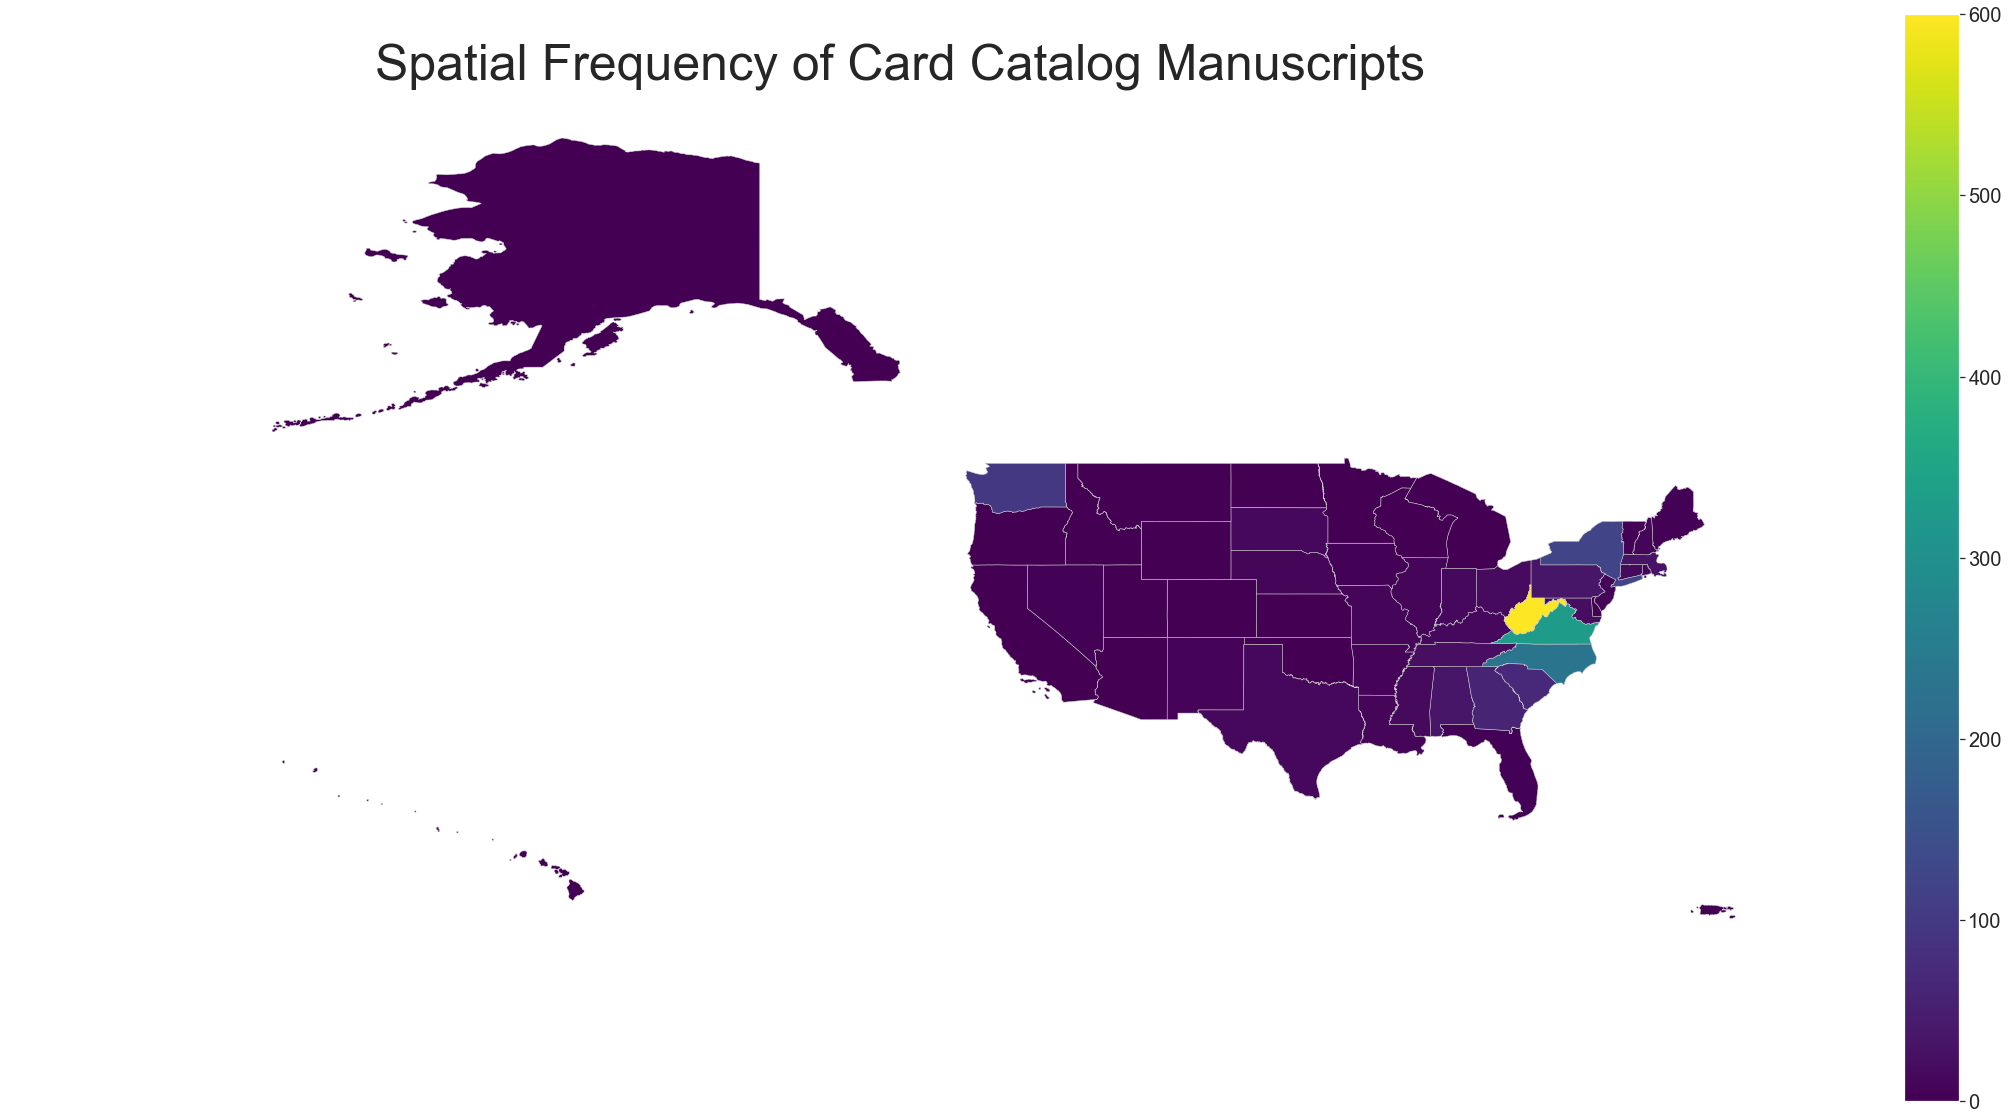

In [77]:
# Test printing heatmap---code adapted from article linked above
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title("Spatial Frequency of Card Catalog Manuscripts", fontdict={'fontsize': '50', 'fontweight' : '3'})

color = 'viridis'
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=0, vmax=600))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
plt.xlim([-200, -60])
plt.ylim([10, 75])

usa.plot('Count', cmap=color, linewidth=0.5, ax=ax, edgecolor='0.8', figsize=(40, 20))